<a href="https://colab.research.google.com/github/AlfaIV/Electronics-and-Circuitry/blob/main/%D0%A6%D0%9E%D0%A1_%D0%94%D0%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

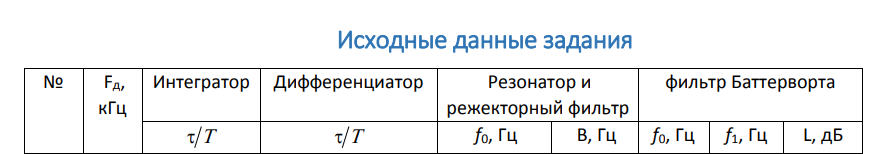

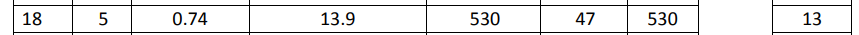

In [ ]:
from math import exp, pi, cos, log10, ceil, tan, sqrt, sin, cos

import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import root

from sympy.solvers import solve
from sympy import Symbol, Abs

## Расчет ЦФ, эквивалентного дифференцирующей RC цепи 

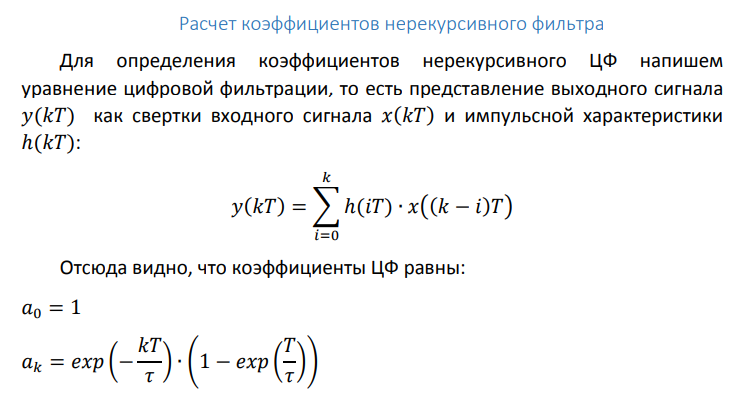

In [ ]:
tau_div_T = 0.75

In [ ]:
a_k = lambda k:exp(-k/tau_div_T)*(1 - exp(1/tau_div_T))

In [ ]:
N = 4
a_k(N)/a_k(1) < 1/20

True

Требуемое колическтво элементов фильтра - 4

In [ ]:
# расчет коэффициентов и формулы
i = np.arange(0,N,1)
a = np.vectorize(a_k)(i)
a[0] = 1
y_1 = lambda x: sum([a[i]*x[i] for i in range(N)])
a

array([ 1.        , -0.73640286, -0.19411369, -0.05116781])

In [ ]:
# def gen_x(test_data  = [1 for i in range(N)]):
#   x = []
#   for i in range(30):
#     x_i = []
#     for y in range(N):
#       if i < N + y and i - y >= 0:
#         x_i.append(test_data[y])
#       else:
#         x_i.append(0)
#     x.append(x_i)
#   return x

In [ ]:

x_1_data = [1 for i in range(N)] + [0 for i in range(30-N)]
def get_x(x_data, i):
  x = []
  for N_i in range(N):
    if i - N_i >= 0:
      x.append(x_data[i - N_i])
    else:
      x.append(0)
  return x
  

In [ ]:
# [get_x(x_1_data,i) for i in range(len(x_1_data))]
get_x(x_1_data,1)

[1, 1, 0, 0]

In [ ]:
y_1_data = [y_1(get_x(x_1_data,i)) for i in range(len(x_1_data))]
i_1_data = range(0,30)

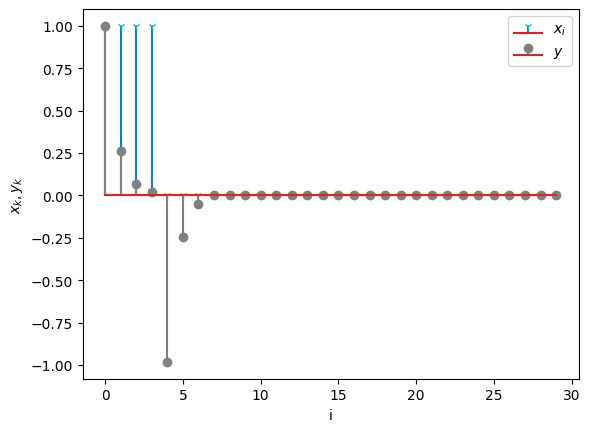

In [ ]:
plt.stem(i_1_data, x_1_data, markerfmt ='c1',label = "$x_i$")
plt.stem(i_1_data, y_1_data, linefmt ='grey',label = "$y$")
plt.title('')
plt.xlabel("i")
plt.ylabel("$x_k, y_k$")
plt.legend()
plt.show()

## Расчет ЦФ, эквивалентного интегрирующей RC-цепи 

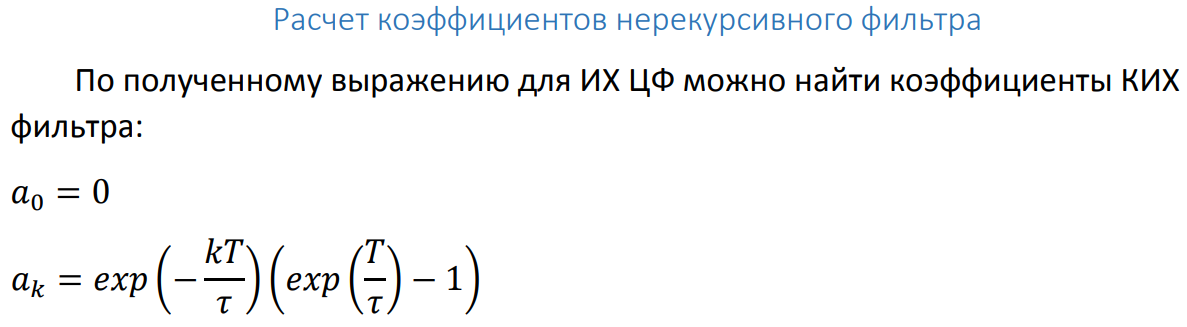

In [ ]:
tau_div_T = 13.9

In [ ]:
a_k = lambda k:exp(-k/tau_div_T)*(exp(1/tau_div_T) - 1)

In [ ]:
N = 43
a_k(N)/a_k(1) < 1/20

True

Так как требуемое количество элементов фильтра превышает 10, то используем рекурсивный фильтр

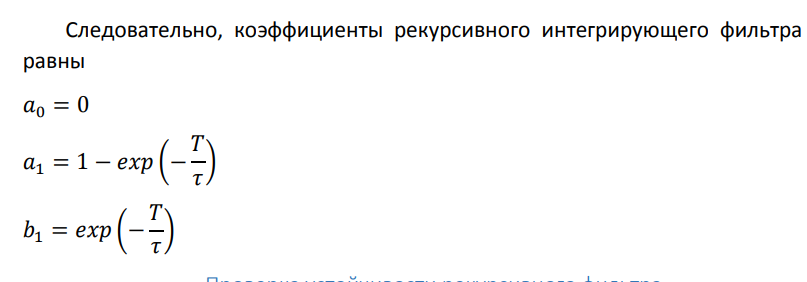

In [ ]:
# расчет коэффициентов и формулы
a_0 = 0
a_1 = 1 - exp(-1/tau_div_T)
b_1 = exp(-1/tau_div_T)
a_1,b_1

(0.06941554691258178, 0.9305844530874182)

Проведем проверку на устойчивать фильтра

In [ ]:
solve = root(lambda z: 1 - 0.97*(z**(-1)), 0.9).x[0]
solve, solve <= 1

(0.9699999999999986, True)

Как видим, фильтр устойчив

In [ ]:
y_0 = lambda x,y: a_1*x + b_1*y

In [ ]:
i_data = [i for i in range(55)]
x_data = [1 for i in range(5)] + [0 for i in range(55 - 5)]
previous_y = 0
y_data = []
for i in range(len(x_data)):
  y_data.append(y_0(x_data[i],previous_y))
  previous_y = y_data[i]

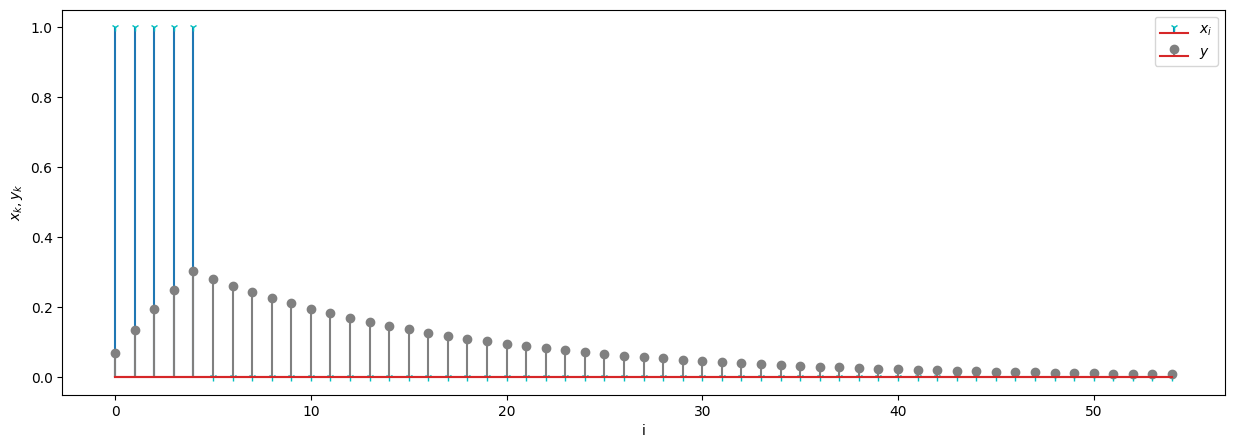

In [ ]:
plt.figure(figsize=(15,5))
plt.stem(i_data, x_data, markerfmt ='c1',label = "$x_i$")
plt.stem(i_data, y_data, linefmt ='grey',label = "$y$")
plt.title('')
plt.xlabel("i")
plt.ylabel("$x_k, y_k$")
plt.legend()

plt.show()

## Расчет цифрового резонатора

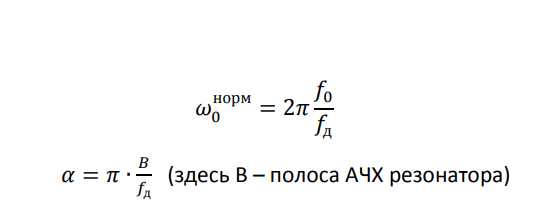

Начальные условия

In [ ]:
f_0 = 530
B = 47
f_d = 5e3

In [ ]:
w_0_norm = 2*pi*f_0/f_d
alpha = pi*B/f_d
print("w_0_norm: ", w_0_norm, " alpha: ", alpha)

w_0_norm:  0.6660176425610361  alpha:  0.02953097094374406


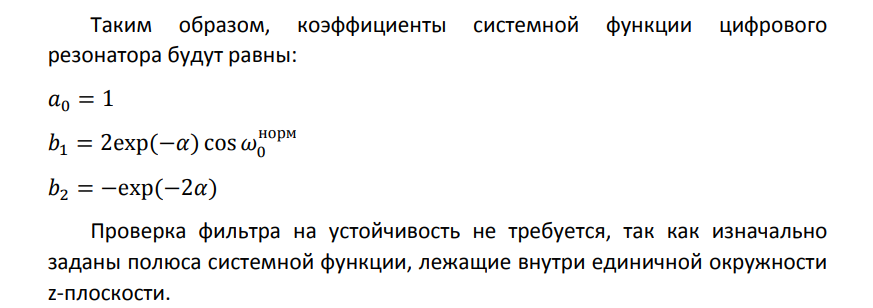

In [ ]:
a_0 = 1
b_1 = 2*exp(-alpha)*cos(w_0_norm)
b_2 = -exp(-2*alpha)
print(f"b1: {b_1}, b2: {b_2}")

b1: 1.526816147317778, b2: -0.9426483779289204


In [ ]:
y_0 = lambda x,y: a_0*x[0] + b_1*y[0] + b_2*y[1]

In [ ]:
i_data = [i for i in range(55)]
x_data = [1 for i in range(5)] + [0 for i in range(55 - 5)]
previous_y = 0
previous_y_2 = 0
y_data = []
for i in range(len(x_data)):
  y_data.append(y_0([x_data[i]],
                    [previous_y,previous_y_2]))
  previous_y_2 = previous_y
  previous_y = y_data[i]

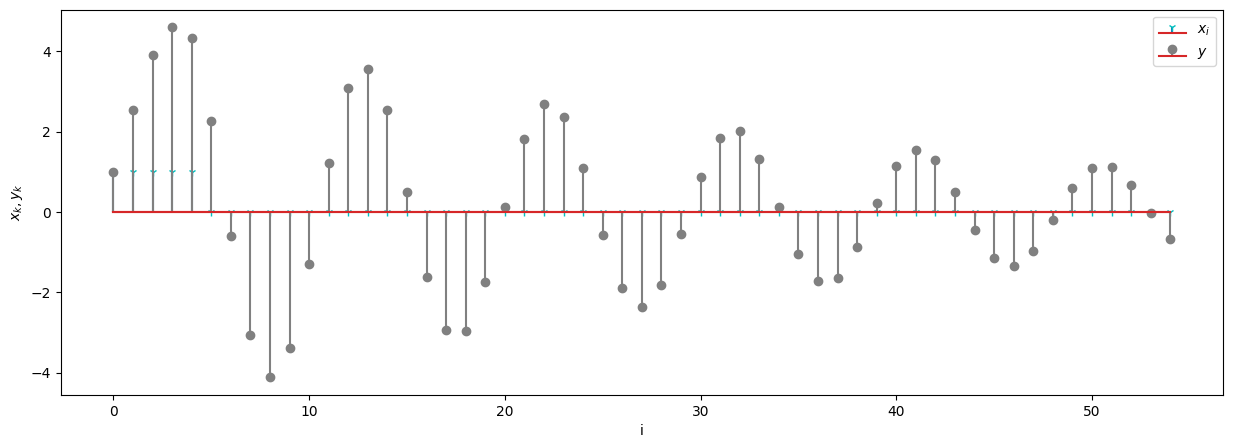

In [ ]:
plt.figure(figsize=(15,5))
plt.stem(i_data, x_data, markerfmt ='c1',label = "$x_i$")
plt.stem(i_data, y_data, linefmt ='grey',label = "$y$")
plt.title('')
plt.xlabel("i")
plt.ylabel("$x_k, y_k$")
plt.legend()

plt.show()

## Расчет ФНЧ с максимально плоской в полосе прозрачности АЧХ (фильтр Баттерворта) 

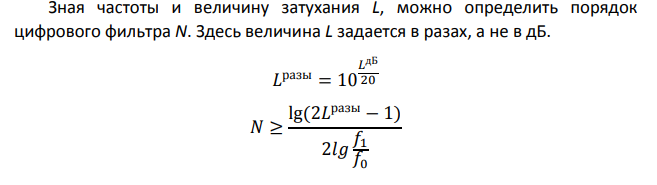

In [ ]:
f_d = 5e3
f_0 = 530
L = 13 #дБ
f_1 = f_0*2

Пересчитаем величину затухания в разы

In [ ]:
L_ = 10**(L/20) #разы
L_

4.466835921509632

найдем порядок фильтра

In [ ]:
N = ceil((log10(2*L_ - 1)/(2*log10(f_1/f_0))))
N

2

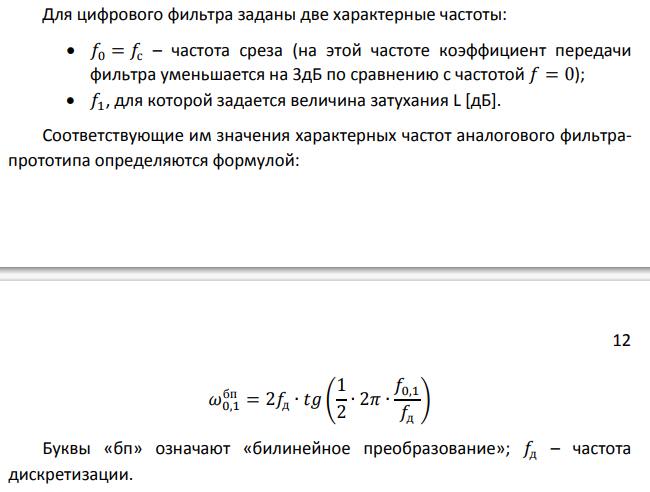

In [ ]:
w_0 = 2*f_d*tan(1/2 * 2*pi * f_0/f_d)
w_1 = 2*f_d*tan(1/2 * 2*pi * f_1/f_d)
print(f"w_0: {w_0}, w_1: {w_1}")

w_0: 3458.901720319035, w_1: 7857.92576664768


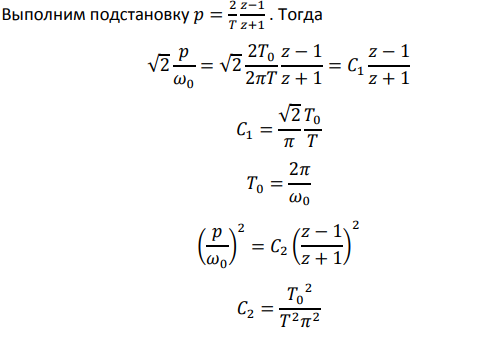

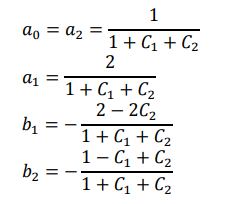

Теперь, проведем расчет коэффициентов фильтра Баттервода

In [ ]:
T = 1/f_d
T_0 = 2*pi/w_0
C_1 = sqrt(2)/pi * T_0/T
C_2 = 1/pi**2 * (T_0/T)**2
print(f"T = {T}; T_0 = {T_0}; C_1 = {C_1}; C_2 = {C_2}")

T = 0.0002; T_0 = 0.0018165261158677995; C_1 = 4.088620252103184; C_2 = 8.358407782954151


In [ ]:
a_2 = a_0 = 1/(1 + C_1 + C_2)
a_1 = 2/(1 + C_1 + C_2)


b_1 = -(2 - 2*C_2)/(1 + C_1 + C_2)
b_2 = -(1 - C_1 + C_2)/(1 + C_1 + C_2)
print(f"a_0 = a_1 = {a_0}; a_2 = {a_2}; b_1 = {b_1}; b_2 = {b_2}")

a_0 = a_1 = 0.07436587455554719; a_2 = 0.07436587455554719; b_1 = 1.094428860231461; b_2 = -0.3918923584536497


Проверка на устойчивость

In [ ]:
z = Symbol('z')
z_solve = solve(1 - b_1*(z**(-1)) - b_2*(z**(-2)), z, numerical=True)
[Abs(z) for z in z_solve],[Abs(z) < 1 for z in z_solve]

([0.626013065721196, 0.626013065721196], [True, True])

Фильтр устойчив

## Расчет режекторного фильтра на основе всепропускающего

In [ ]:
f_sup = f_0 = 530
B = 47
f_d = 5e3

In [ ]:
w_0_norm = 2*pi*f_sup/f_d
B_norm = 2*pi*B/f_d
print(f"w_0_norm = {w_0_norm}; B_norm = {B_norm}")

w_0_norm = 0.6660176425610361; B_norm = 0.05906194188748812


In [ ]:
k_1 = -cos(w_0_norm)
k_2 = (1 - sin(w_0_norm))/cos(w_0_norm)
print(f"k_1 = {k_1}; k_2 = {k_2}")

k_1 = -0.7862884321366189; k_2 = 0.4860053528592014
